# Task 18

In [64]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data injection**

In [2]:
data2 = pd.read_csv('possum.csv')
data=data2.copy()

# Preliminary data Analysis

In [3]:
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
data.tail()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0
103,104,7,other,f,3.0,93.6,59.9,89.0,40.0,67.6,46.0,14.8,28.5,33.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


all datatypes are correct

In [6]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

we have 3 empty cells 2 in ages and 1 in footlength

should i fill now or drop?

In [7]:
data.fillna(0, inplace=True)

In [8]:
data.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [9]:
data['case'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104])

In [10]:
data['case'].nunique()

104

There are 104 unique cases and 104 rows.which means that we dont have duplicate casses

In [11]:
data['site'].nunique()

7

we have 7 unique sites from (1-7)
which means 7 sites were selected 

In [12]:
data['site'].unique()

array([1, 2, 3, 4, 5, 6, 7])

In [13]:
data['Pop'].nunique()

2

In [14]:
data['Pop'].unique()

array(['Vic', 'other'], dtype=object)

we have 2 unique populations. victoria  and others(this could be anywhere else)
is there a reason why the others was not specifically mentioned?

In [15]:
data['sex'].unique()

array(['m', 'f'], dtype=object)

we have just two genders male and females

In [16]:
data.set_index('Pop', inplace=True)

In [17]:
data.groupby(['Pop','sex'])['sex'].value_counts().head()

Pop    sex
Vic    f      24
       m      22
other  f      19
       m      39
Name: count, dtype: int64

from the first population which is  victoria we have 

**females** = 24

**male** = 22

**others*

**females** = 19

**male** = 39

this could mean that there are more boys present in location others than in victoria

In [18]:
femaledata=data[data['sex']=='f']

In [19]:
maledata=data[data['sex']=='m']

In [20]:
femaledata.groupby(['Pop','sex'])[['age']].value_counts()

Pop    sex  age
Vic    f    2.0    5
            6.0    5
            1.0    3
            3.0    3
            4.0    3
            5.0    3
            9.0    2
other  f    3.0    8
            4.0    3
            5.0    3
            2.0    2
            6.0    2
            7.0    1
Name: count, dtype: int64

In [21]:
femaledata.groupby(['Pop','sex'])[['age']].max()

,,age
Pop,sex,
Vic,f,9.0
other,f,7.0


In [22]:
femaledata.groupby(['Pop','sex'])[['age']].min()

,,age
Pop,sex,
Vic,f,1.0
other,f,2.0


In [23]:
maledata.groupby(['Pop','sex'])[['age']].value_counts()

Pop    sex  age
Vic    m    3.0    7
            2.0    4
            4.0    3
            7.0    3
            0.0    2
            5.0    2
            8.0    1
other  m    3.0    9
            1.0    7
            2.0    5
            4.0    5
            5.0    5
            6.0    5
            7.0    3
Name: count, dtype: int64

In [24]:
maledata.groupby(['Pop','sex'])[['age']].max()

,,age
Pop,sex,
Vic,m,8.0
other,m,7.0


In [25]:
femaledata.groupby(['Pop','sex'])[['age']].max()

,,age
Pop,sex,
Vic,f,9.0
other,f,7.0


In [26]:
maledata.groupby(['Pop','sex'])[['age']].min()

,,age
Pop,sex,
Vic,m,0.0
other,m,1.0


so the empty age was found in victoria  and he is a male 

In [27]:
femaledata.groupby(['Pop','sex'])[['age']].min()

,,age
Pop,sex,
Vic,f,1.0
other,f,2.0


In [28]:
maledata.groupby(['Pop','age'])[['hdlngth']].mean()

hdlngth
Pop   age           
Vic   0.0  88.250000
      2.0  93.450000
      3.0  92.528571
      4.0  93.266667
      5.0  94.000000
      7.0  93.900000
      8.0  94.100000
other 1.0  86.500000
      2.0  96.980000
      3.0  92.611111
      4.0  93.320000
      5.0  95.260000
      6.0  95.100000
      7.0  94.800000

In [29]:
femaledata.groupby(['Pop','age'])[['hdlngth']].mean()

hdlngth
Pop   age           
Vic   1.0  90.833333
      2.0  90.680000
      3.0  93.233333
      4.0  93.866667
      5.0  92.566667
      6.0  93.260000
      9.0  93.350000
other 2.0  90.450000
      3.0  92.100000
      4.0  89.933333
      5.0  93.566667
      6.0  92.200000
      7.0  91.900000

In [30]:
maledata.groupby(['Pop','age'])[['hdlngth']].median()

hdlngth
Pop   age         
Vic   0.0    88.25
      2.0    93.95
      3.0    92.80
      4.0    93.80
      5.0    94.00
      7.0    93.30
      8.0    94.10
other 1.0    86.50
      2.0    98.50
      3.0    91.00
      4.0    93.30
      5.0    94.10
      6.0    93.80
      7.0    95.70

In [31]:
femaledata.groupby(['Pop','age'])[['hdlngth']].median()

hdlngth
Pop   age         
Vic   1.0    93.10
      2.0    90.50
      3.0    92.80
      4.0    94.30
      5.0    94.40
      6.0    93.20
      9.0    93.35
other 2.0    90.45
      3.0    92.20
      4.0    88.70
      5.0    93.50
      6.0    92.20
      7.0    91.90

In [32]:
maledata.groupby(['Pop','age'])[['hdlngth']].std()

hdlngth
Pop   age          
Vic   0.0  4.454773
      2.0  2.037155
      3.0  3.875442
      4.0  1.474223
      5.0  1.555635
      7.0  1.873499
      8.0       NaN
other 1.0  2.247221
      2.0  6.265142
      3.0  4.020399
      4.0  1.788016
      5.0  2.847455
      6.0  2.357965
      7.0  2.666458

In [33]:
femaledata.groupby(['Pop','age'])[['hdlngth']].std()

hdlngth
Pop   age          
Vic   1.0  5.371530
      2.0  1.127830
      3.0  2.478575
      4.0  1.209683
      5.0  3.617089
      6.0  1.186592
      9.0  0.070711
other 2.0  1.202082
      3.0  2.696029
      4.0  4.673685
      5.0  2.000833
      6.0  0.282843
      7.0       NaN

In [34]:
maledata.groupby(['Pop','age'])[['hdlngth']].var()

hdlngth
Pop   age           
Vic   0.0  19.845000
      2.0   4.150000
      3.0  15.019048
      4.0   2.173333
      5.0   2.420000
      7.0   3.510000
      8.0        NaN
other 1.0   5.050000
      2.0  39.252000
      3.0  16.163611
      4.0   3.197000
      5.0   8.108000
      6.0   5.560000
      7.0   7.110000

In [35]:
femaledata.groupby(['Pop','age'])[['hdlngth']].var()

hdlngth
Pop   age           
Vic   1.0  28.853333
      2.0   1.272000
      3.0   6.143333
      4.0   1.463333
      5.0  13.083333
      6.0   1.408000
      9.0   0.005000
other 2.0   1.445000
      3.0   7.268571
      4.0  21.843333
      5.0   4.003333
      6.0   0.080000
      7.0        NaN

# Descriptive data Analysis

In [36]:
# filtering to show from headlengh to belly for males
malefiltered=maledata.loc[:,'hdlngth':'belly']

# Measure of Center

In [37]:
malefiltered.median()

hdlngth     93.2
skullw      56.3
totlngth    86.0
taill       36.5
footlgth    66.9
earconch    46.4
eye         15.0
chest       27.0
belly       32.0
dtype: float64

In [38]:
malefiltered.var()

hdlngth     17.026798
skullw      11.914765
totlngth    18.834699
taill        4.234153
footlgth    15.855568
earconch    15.956727
eye          1.084033
chest        4.671721
belly        6.980464
dtype: float64

**from the variance its looking like we have ouliers in headlenght , totlngth,footlgth,earconch and skullw  for male**  

In [39]:
# checking for totlngth 
maledata.groupby(['Pop','age'])[['totlngth']].min()

totlngth
Pop   age          
Vic   0.0      76.0
      2.0      84.0
      3.0      77.0
      4.0      85.0
      5.0      85.5
      7.0      80.5
      8.0      89.0
other 1.0      80.5
      2.0      85.0
      3.0      80.5
      4.0      82.5
      5.0      84.0
      6.0      84.0
      7.0      84.0

In [40]:
maledata.groupby(['Pop','age'])[['totlngth']].max()

totlngth
Pop   age          
Vic   0.0      84.0
      2.0      90.0
      3.0      93.0
      4.0      87.0
      5.0      89.5
      7.0      90.0
      8.0      89.0
other 1.0      84.0
      2.0      96.0
      3.0      93.7
      4.0      88.5
      5.0      89.0
      6.0      93.5
      7.0      91.5

In [41]:
# filtering to sho from headlengh to belly
femalefiltered=femaledata.loc[:,'hdlngth':'belly']

In [42]:
malefiltered.median()

hdlngth     93.2
skullw      56.3
totlngth    86.0
taill       36.5
footlgth    66.9
earconch    46.4
eye         15.0
chest       27.0
belly       32.0
dtype: float64

# Measures of Spread

In [43]:
femalefiltered.var()

hdlngth       6.630177
skullw        6.598671
totlngth     17.491141
taill         3.351883
footlgth    134.627121
earconch     18.270875
eye           1.061052
chest         3.389535
belly         8.581395
dtype: float64

**or the females we have outliers in totlenth, earconch   but the one that need a goood attention is th footlgth it has a very large value of spread**

In [44]:
femaledata.groupby(['Pop','age'])[['footlgth']].min()

footlgth
Pop   age          
Vic   1.0      68.7
      2.0      70.3
      3.0      72.8
      4.0      72.8
      5.0       0.0
      6.0      70.9
      9.0      72.4
other 2.0      63.1
      3.0      60.3
      4.0      60.7
      5.0      64.0
      6.0      63.5
      7.0      65.4

**this is showing that the oulier originated room a row that has a footlength of 0. could this be the place where i did fillna for the empty cells or coul it be that one of the possom doesnt have a foot(could she be injured?)**


so let me go down to the footlght column and check for my self


In [45]:
femalefiltered[femalefiltered['footlgth'] == 0]

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
Pop,,,,,,,,,
Vic,88.4,57.0,83.0,36.5,0.0,40.3,15.9,27.0,30.5


so it is just one row that has this which means it was the row where i did a fill na of 0

should i drop the row since it is having a negative impact on my data?

# Percentile and interquartile range

In [46]:
percentilesmale = malefiltered.quantile([0.10, 0.25, 0.50, 0.75])
percentilesfemale = femalefiltered.quantile([0.10, 0.25, 0.50, 0.75])

percentiles1 = data.loc[:,'age':'belly']
percentiles = percentiles1.quantile([0.10, 0.25, 0.50, 0.75])


In [47]:
print('For the whole data')
percentiles


For the whole data


,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0.10,1.0,88.400,53.860,81.5,35.000,62.83,43.36,14.000,24.5,29.000
0.25,2.0,90.675,54.975,84.0,35.875,64.50,44.80,14.400,25.5,31.000
0.50,3.0,92.800,56.350,88.0,37.000,67.95,46.80,14.900,27.0,32.500
0.75,5.0,94.725,58.100,90.0,38.000,72.50,52.00,15.725,28.0,34.125


In [48]:
print("\nfor the males")

percentilesmale


for the males


,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0.10,86.7,53.1,81.0,34.5,62.9,43.5,14.2,24.0,28.5
0.25,90.7,54.8,84.0,35.5,64.5,44.8,14.5,25.0,30.5
0.50,93.2,56.3,86.0,36.5,66.9,46.4,15.0,27.0,32.0
0.75,95.4,59.0,89.5,38.0,71.5,51.8,15.9,28.0,35.0


In [49]:
print("\nfor the females\n")
percentilesfemale




for the females



,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0.10,88.82,54.08,82.60,35.00,62.20,43.34,13.60,25.0,30.00
0.25,90.75,55.20,85.25,36.00,64.45,44.65,14.10,26.0,31.25
0.50,92.50,56.40,88.50,37.50,70.30,50.80,14.80,28.0,33.00
0.75,93.80,57.65,90.50,38.25,72.80,52.30,15.45,28.5,34.00


In [50]:
for i in  list(percentiles):
    iqr = percentiles.loc[0.75,i] - percentiles.loc[0.25,i]
    print (f'{i}\t\t',iqr)


age		 3.0
hdlngth		 4.049999999999997
skullw		 3.125
totlngth		 6.0
taill		 2.125
footlgth		 8.0
earconch		 7.200000000000003
eye		 1.3249999999999993
chest		 2.5
belly		 3.125


In [51]:
for i in  list(percentilesmale):
    iqr = percentilesmale.loc[0.75,i] - percentilesmale.loc[0.25,i]
    print (f'{i}\t\t',iqr)

hdlngth		 4.700000000000003
skullw		 4.200000000000003
totlngth		 5.5
taill		 2.5
footlgth		 7.0
earconch		 7.0
eye		 1.4000000000000004
chest		 3.0
belly		 4.5


In [52]:
for i in  list(percentilesfemale):
    iqr = percentilesfemale.loc[0.75,i] - percentilesfemale.loc[0.25,i]
    print (f'{i}\t\t',iqr)

hdlngth		 3.049999999999997
skullw		 2.450000000000003
totlngth		 5.25
taill		 2.25
footlgth		 8.350000000000009
earconch		 7.6499999999999915
eye		 1.3499999999999996
chest		 2.5
belly		 2.75


# Skewness

In [53]:
# skewness for the whole population data
population_skew = percentiles1.skew()
male_skew = malefiltered.skew()
female_skew = femalefiltered.skew()

In [54]:
print("Population skewness \n",population_skew)

Population skewness 
 age         0.453608
hdlngth    -0.055974
skullw      1.007540
totlngth   -0.285266
taill       0.167869
footlgth   -5.908088
earconch    0.154808
eye         0.392741
chest      -0.055511
belly       0.073975
dtype: float64


In [55]:
print("\nMale skew: \n",male_skew)


Male skew: 
 hdlngth    -0.080197
skullw      0.714084
totlngth   -0.093342
taill       0.504562
footlgth    0.214397
earconch    0.516551
eye         0.481375
chest       0.063709
belly      -0.066829
dtype: float64


In [56]:
print('\nfemale skewness\n',female_skew)


female skewness
 hdlngth    -0.776119
skullw      1.719264
totlngth   -0.588824
taill      -0.474552
footlgth   -4.849018
earconch   -0.304123
eye         0.315800
chest      -0.121205
belly       0.169161
dtype: float64


**The skewness for all the column is less than 3 so it is platykurtic which means light tails and a flatter peak**

but the female data had a bigger skew of -4.8 and 1.7 i want to know what that means 

the population too has a skulllength andd footlenght of 1 and -5 this is also something i should look into


**The male population has a skewwness closer to zero so it is closer to being a normal distribution**

In [57]:
malefiltered.describe()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,92.922951,57.091803,86.511475,36.942623,68.009836,47.816393,15.211475,26.762295,32.377049
std,4.126354,3.451777,4.339896,2.057706,3.981905,3.994587,1.041169,2.161417,2.642057
min,82.500000,50.000000,76.000000,32.000000,62.000000,41.700000,12.800000,22.000000,27.000000
25%,90.700000,54.800000,84.000000,35.500000,64.500000,44.800000,14.500000,25.000000,30.500000
50%,93.200000,56.300000,86.000000,36.500000,66.900000,46.400000,15.000000,27.000000,32.000000
75%,95.400000,59.000000,89.500000,38.000000,71.500000,51.800000,15.900000,28.000000,35.000000
max,103.100000,68.600000,96.000000,43.000000,75.000000,56.200000,17.800000,32.000000,38.000000


In [58]:
femalefiltered.describe()

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,92.148837,56.588372,87.906977,37.104651,67.504651,48.576744,14.811628,27.337209,32.883721
std,2.574913,2.568788,4.182241,1.830815,11.602893,4.274444,1.030074,1.841069,2.929402
min,84.700000,51.500000,75.000000,32.000000,0.000000,40.300000,13.000000,23.000000,25.000000
25%,90.750000,55.200000,85.250000,36.000000,64.450000,44.650000,14.100000,26.000000,31.250000
50%,92.500000,56.400000,88.500000,37.500000,70.300000,50.800000,14.800000,28.000000,33.000000
75%,93.800000,57.650000,90.500000,38.250000,72.800000,52.300000,15.450000,28.500000,34.000000
max,96.900000,67.700000,96.500000,41.000000,77.900000,53.900000,17.400000,31.000000,40.000000


# kurtosis

In [59]:
# kurtosis for the whole population data
population_kurt = percentiles1.kurtosis()
male_kurt = malefiltered.kurtosis()
female_kurt = femalefiltered.kurtosis()

In [60]:
#population
population_kurt

age         -0.264068
hdlngth      0.890902
skullw       2.476359
totlngth    -0.104531
taill        0.397197
footlgth    49.870011
earconch    -1.361930
eye          0.054552
chest       -0.280747
belly        0.172582
dtype: float64

In [61]:
male_kurt

hdlngth     0.343549
skullw      1.170374
totlngth   -0.458964
taill       0.580597
footlgth   -1.362882
earconch   -1.070849
eye         0.040924
chest      -0.260781
belly      -0.748588
dtype: float64

In [62]:
female_kurt

hdlngth      0.809784
skullw       7.561961
totlngth     1.045315
taill        0.333775
footlgth    28.325476
earconch    -1.444657
eye          0.054242
chest       -0.281966
belly        1.067351
dtype: float64

malefiltered

femalefiltered

data

# PLOTS

In [69]:
data.columns

Index(['case', 'site', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

['case', 'site', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']


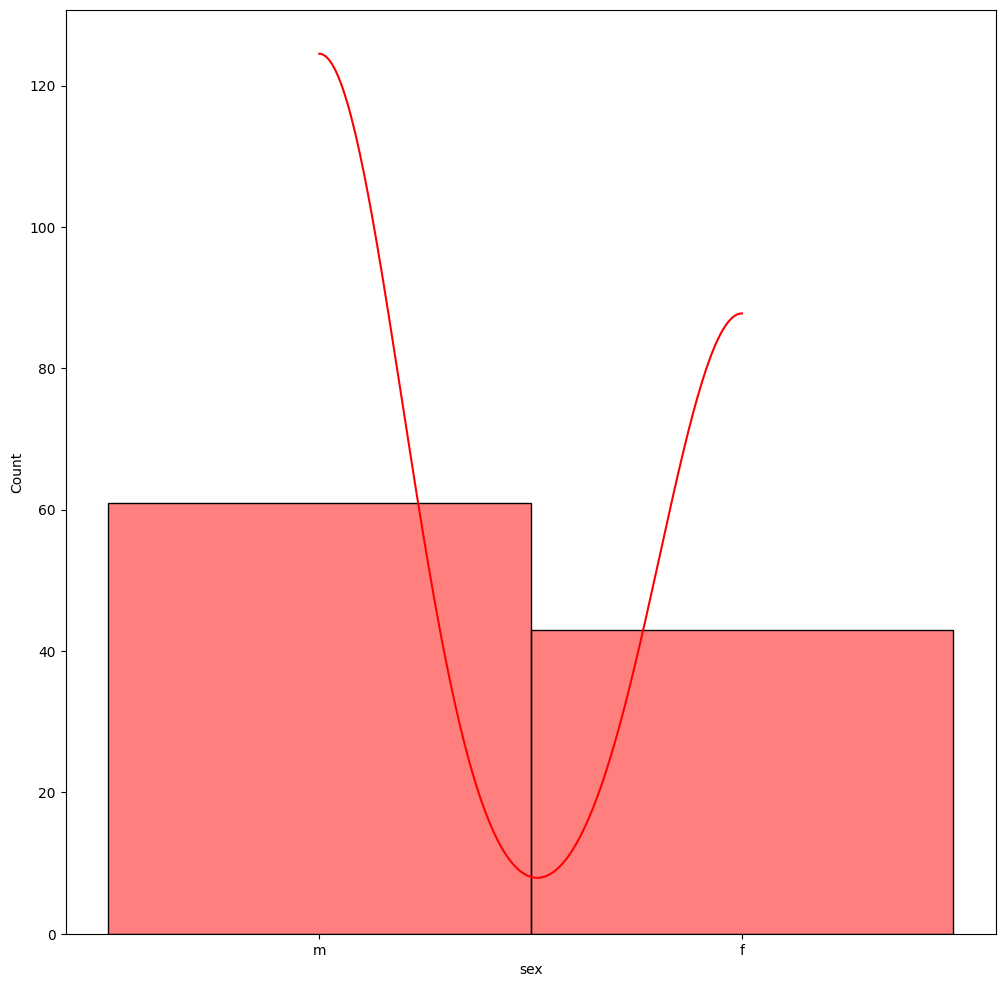

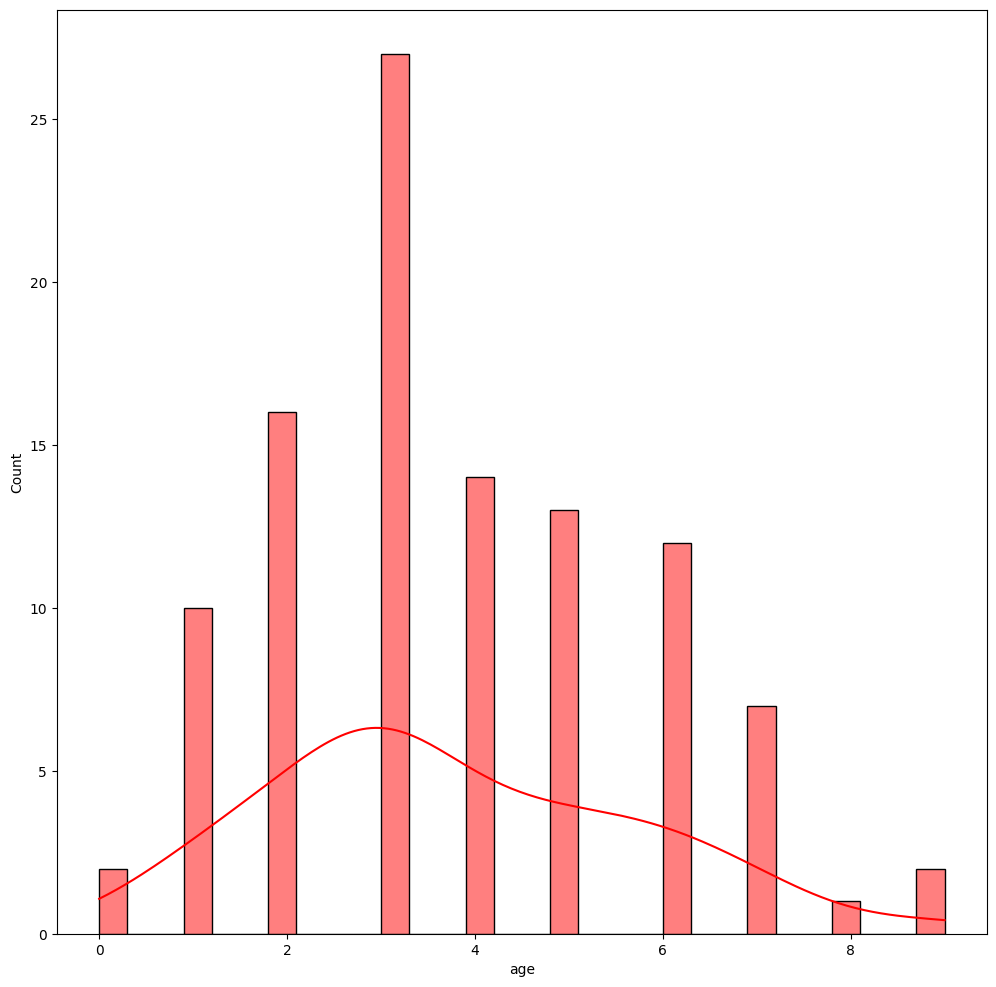

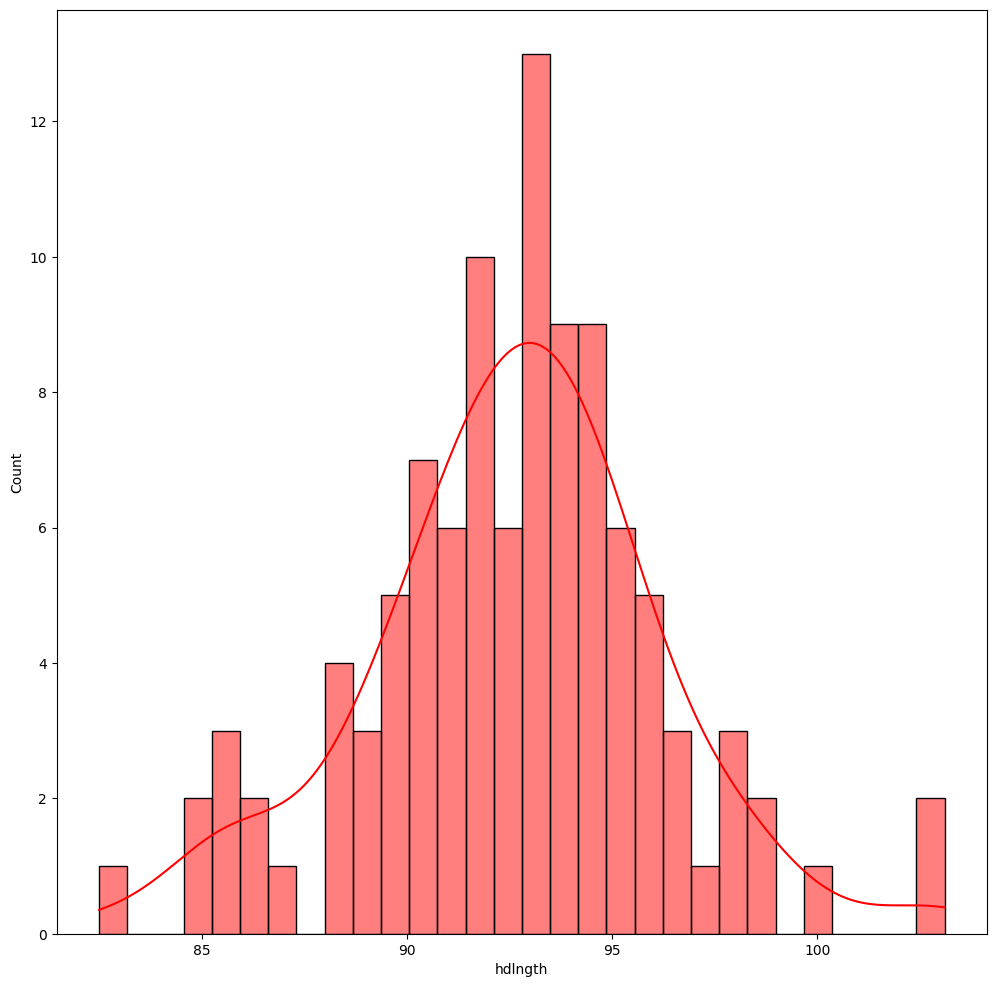

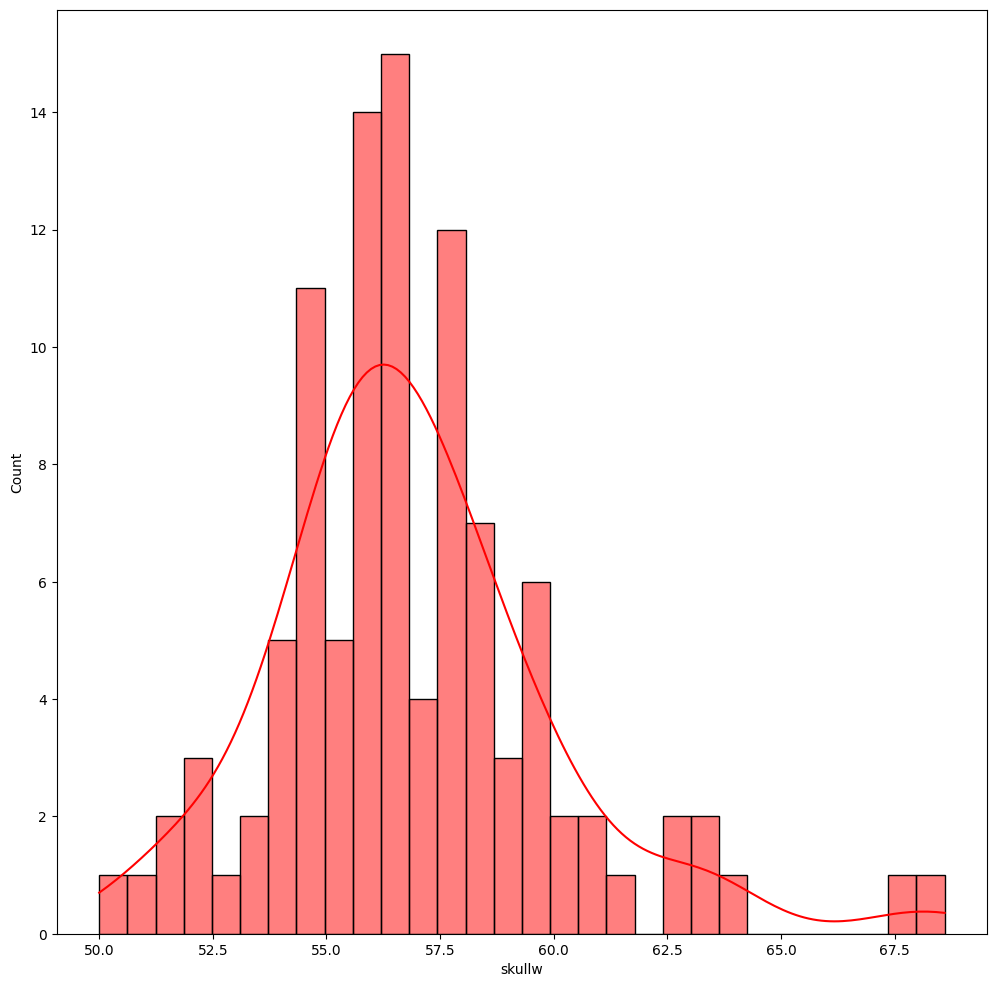

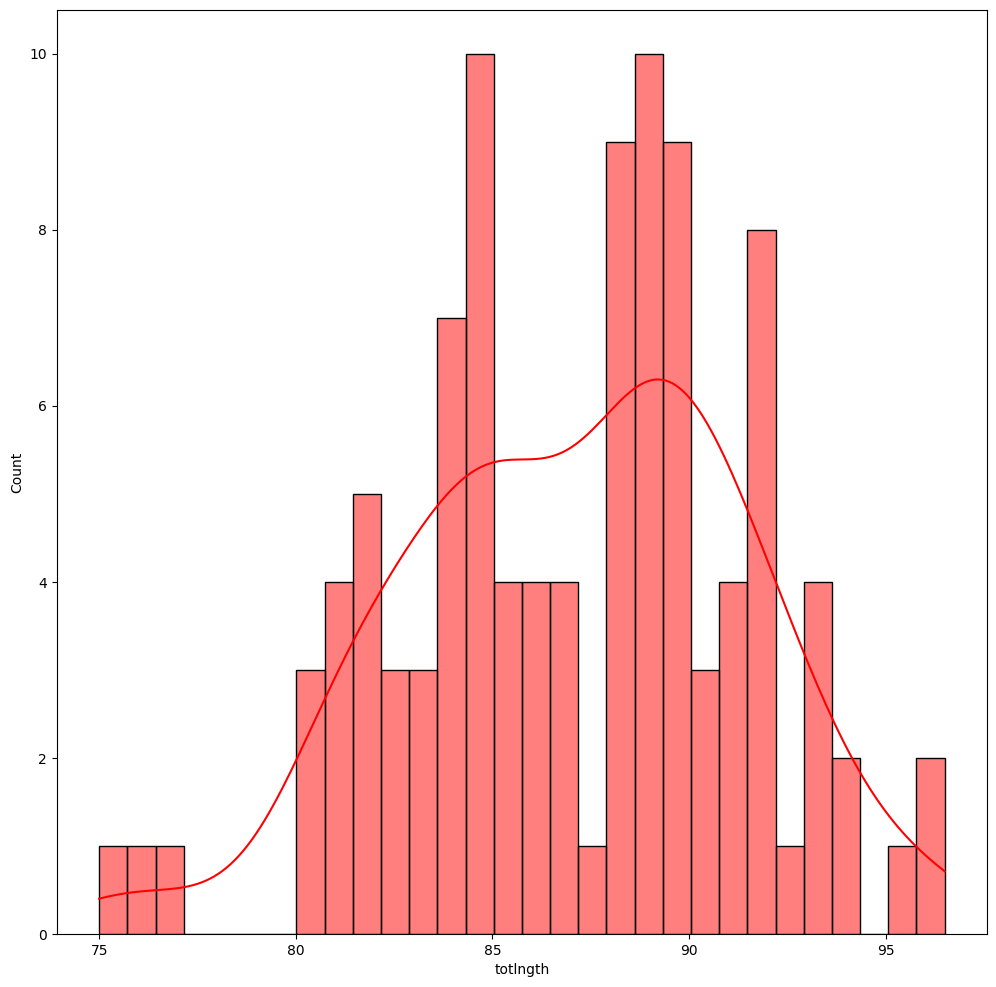

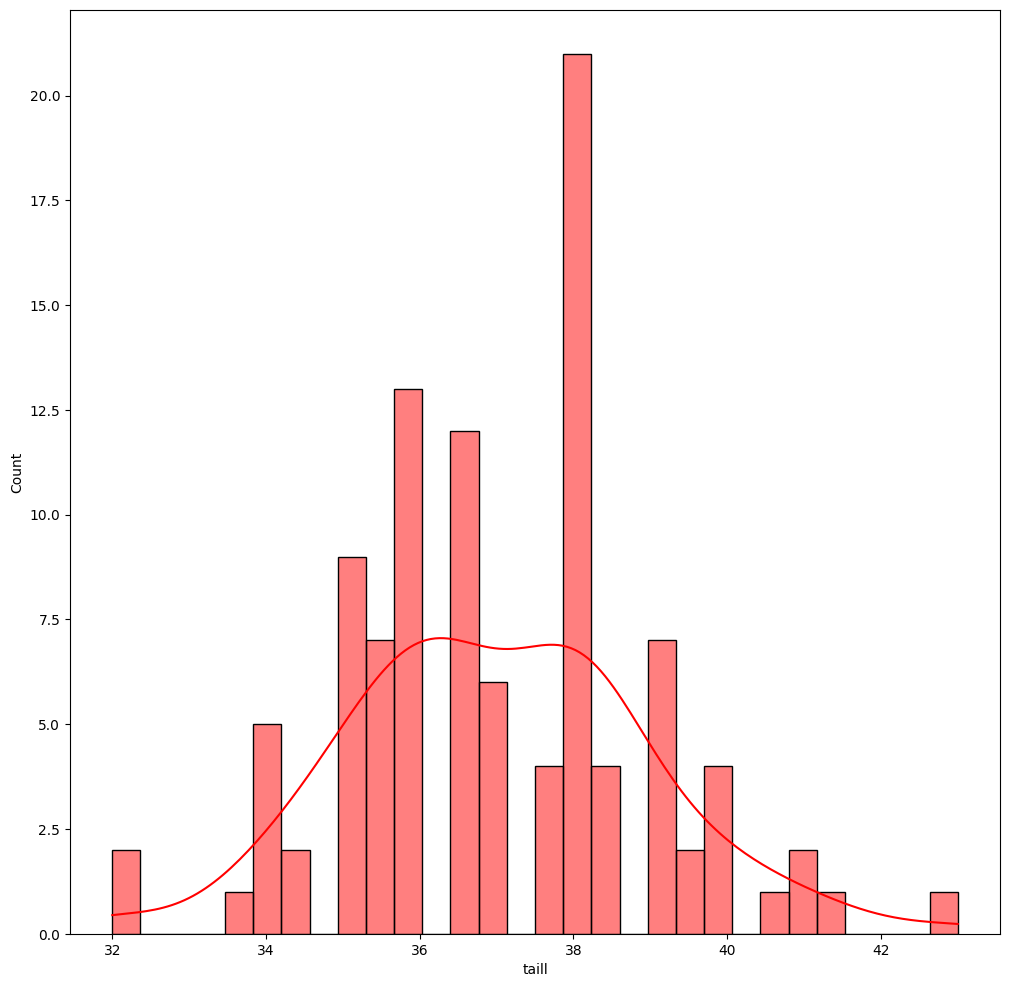

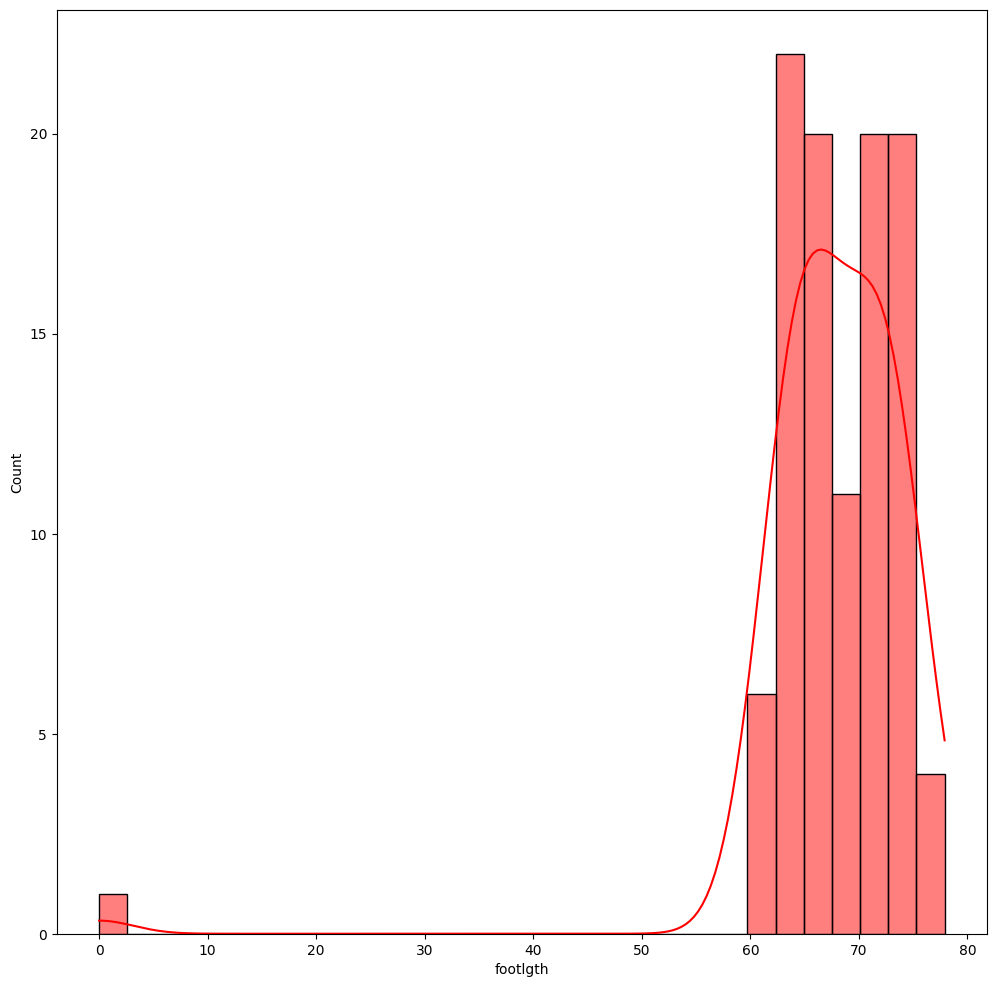

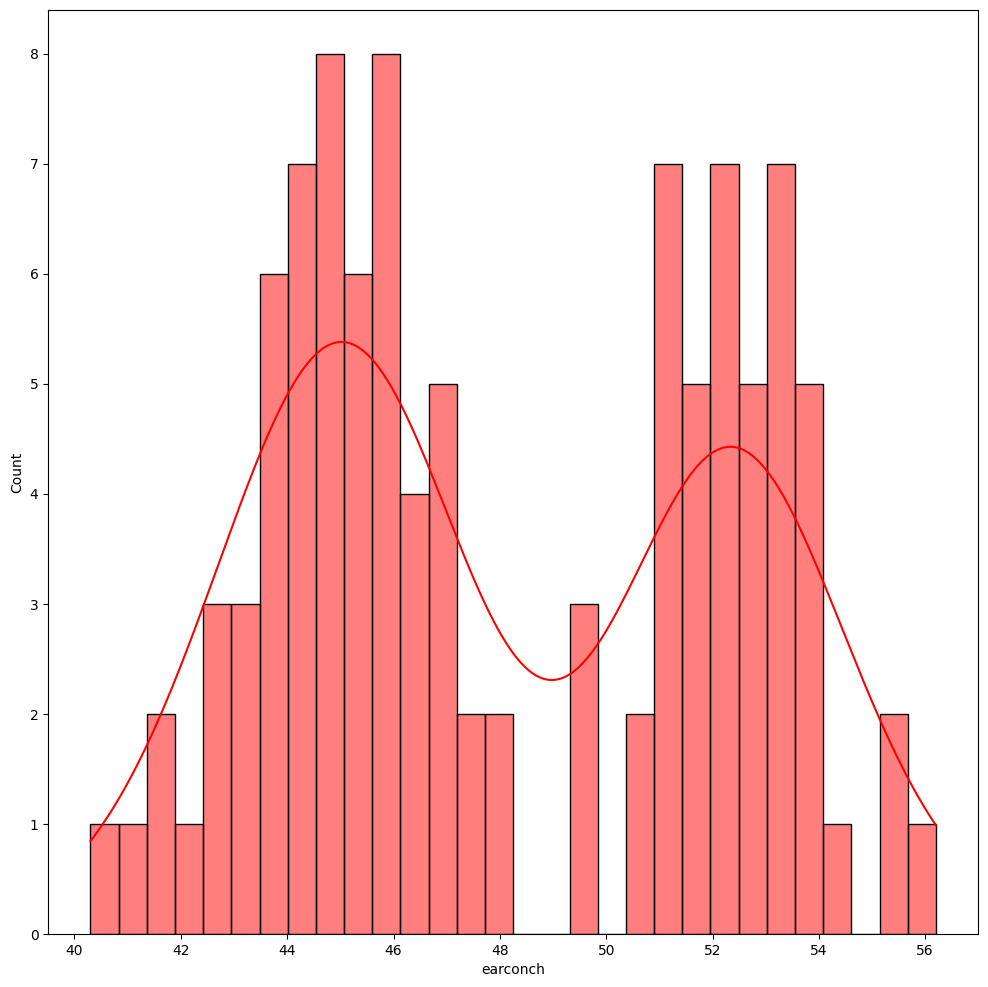

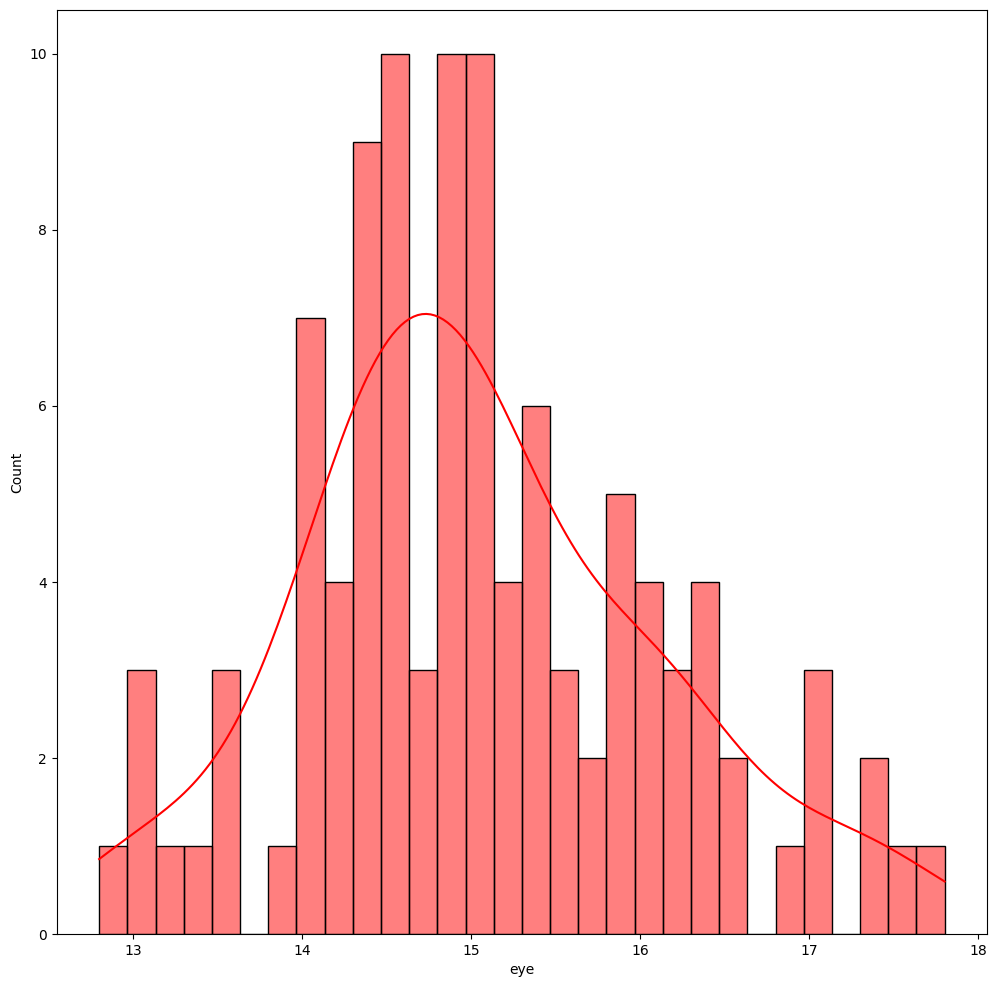

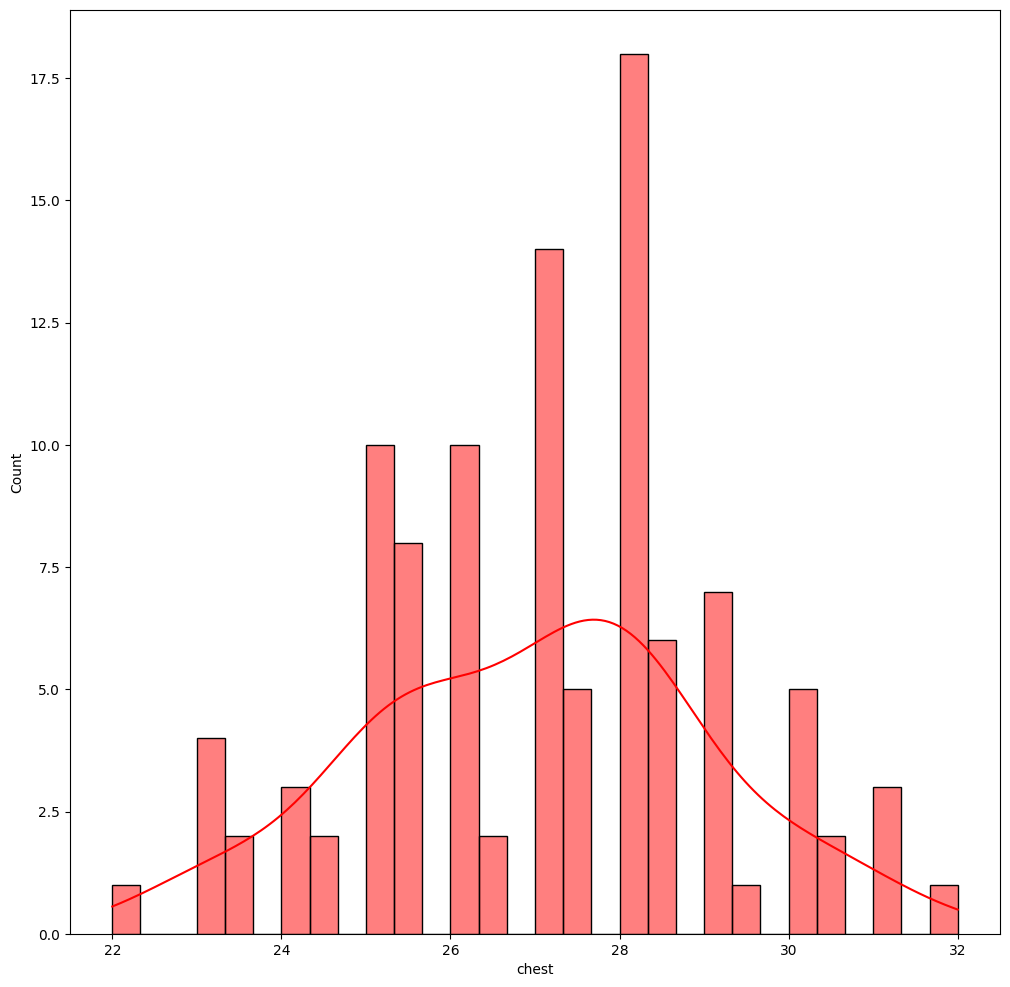

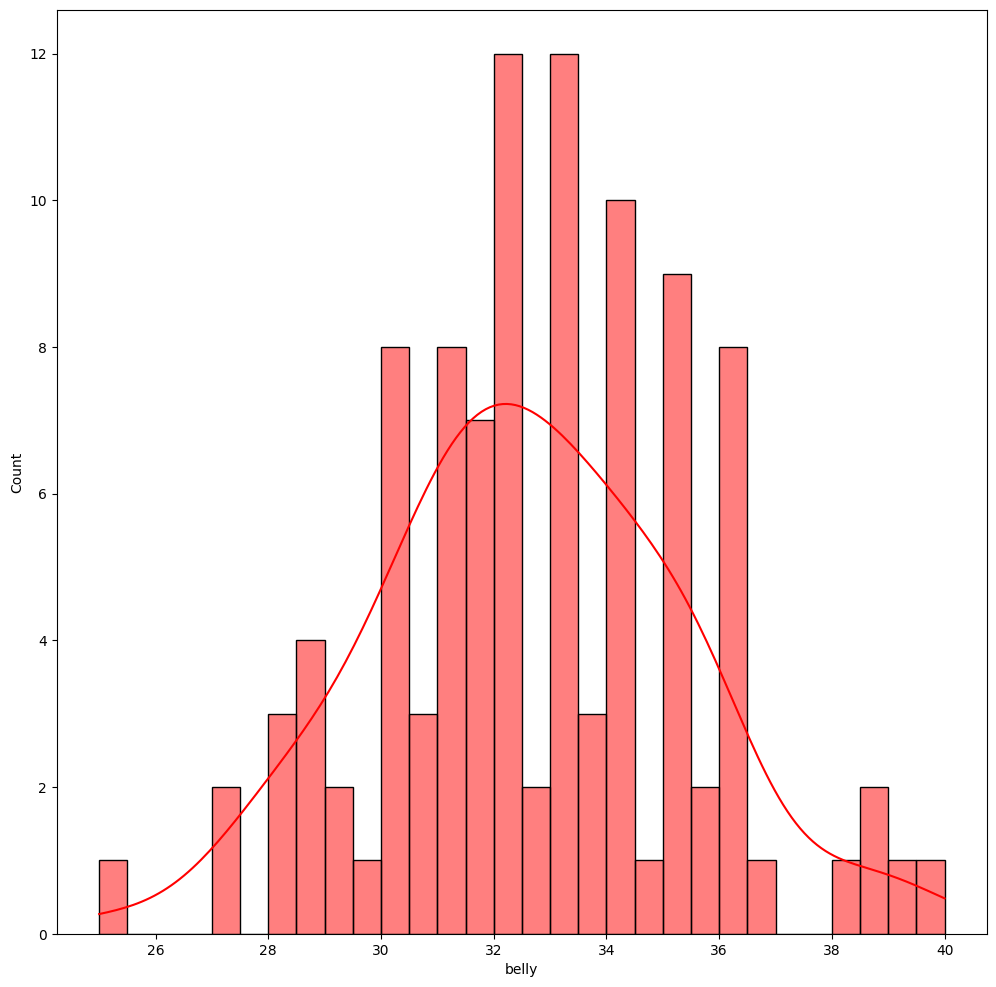

In [141]:
datalist=list(data.columns)
print(datalist)
for i in list(datalist[2:]):
    plt.figure(figsize=(12,12))
    sns.histplot(data[i],bins=30,kde=True,color='red')
    plt.show()

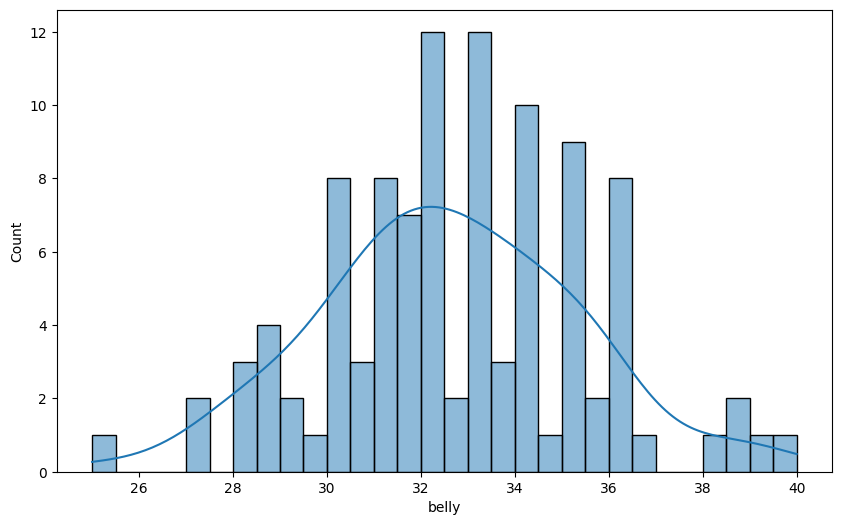

In [136]:
plt.figure(figsize=(10,6))
sns.histplot(data['belly'],bins=30,kde=True)
plt.show()

In [ ]:
datalist=list(data.columns)
print(datalist)
for i in list(datalist[2:]):
    newdata=data.groupby(i)[i].value_counts()
    print(newdata)
    plt.figure(figsize=(12,12))
    sns.histplot(newdata,bins=30,kde=True)
    plt.show()

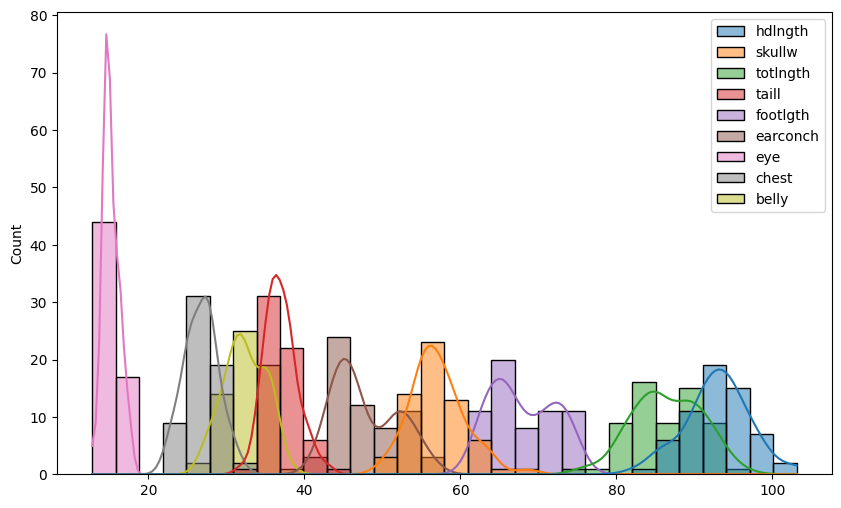

In [129]:
plt.figure(figsize=(10,6))
sns.histplot(malefiltered,bins=30,kde=True)
plt.show()

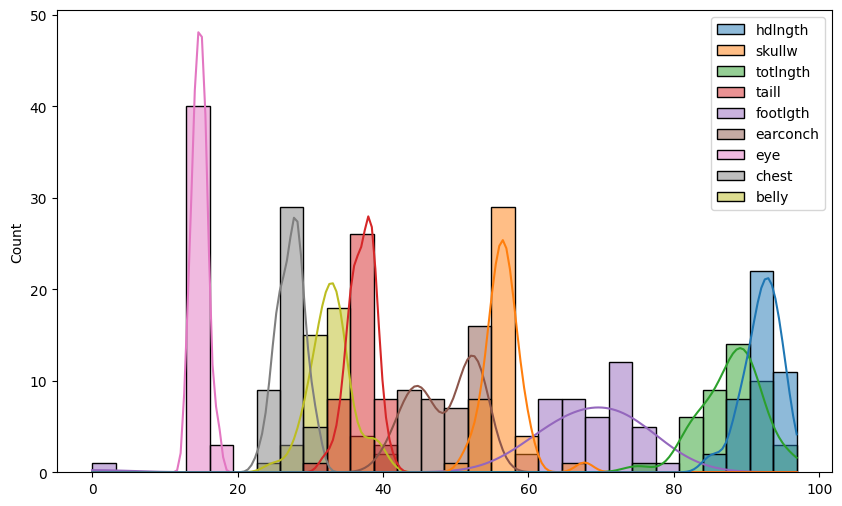

In [130]:
plt.figure(figsize=(10,6))
sns.histplot(femalefiltered,bins=30,kde=True)
plt.show()